# Mempersiapkan tool yang akan digunakan

## Melihat Versi Packages yang dimiliki

In [1]:
!pip list

Package                      Version
---------------------------- -------------
absl-py                      1.2.0
apturl                       0.5.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
autocorrect                  2.6.1
backcall                     0.2.0
bcrypt                       3.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.4
blosc                        1.11.1
Brlapi                       0.8.3
cachetools                   5.2.0
certifi                      2020.6.20
cffi                         1.15.1
chardet                      4.0.0
click                        8.0.3
colorama                     0.4.4
command-not-found            0.3
contourpy                    1.0.5
cryptography                 3.4.8
cupshelpers                  1.0
cvxopt                       1.3.0
cvxpy 

## Menampilkan versi python yang digunakan

In [2]:
!python3 --version

Python 3.10.6


In [4]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 50.7 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import mediapipe as mp

2023-05-30 17:35:26.592257: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 17:35:26.825184: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 17:35:26.827060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 17:35:28.275472: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# DATADIR = '/content/drive/MyDrive/Colab Notebooks/dataset/custom_data/'
DATADIR = './dataset/'
TRAIN_PATH = DATADIR + 'Train'
TEST_PATH = DATADIR + 'Valid'

# Define hyperparameters
batch_size = 32 # increase the batch size to 32
num_classes = 26
epochs = 50 # increase the number of epochs to 50

# Create image data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # increase the rotation range to 20 degrees
    width_shift_range=0.1, # increase the width shift range to 0.2
    height_shift_range=0.1, # increase the height shift range to 0.2
    shear_range=0.2, # increase the shear range to 0.2
    zoom_range=0.2, # increase the zoom range to 0.2
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create image data generator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data from directory
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, # directory of training images
    target_size=(224, 224), # resize images to 224x224
    color_mode='rgb', # use grayscale images
    batch_size=batch_size,
    class_mode='categorical' # use one-hot encoding for labels
)

val_generator = val_datagen.flow_from_directory(
    TEST_PATH, # directory of validation images
    target_size=(224, 224), # resize images to 224x224
    color_mode='rgb', # use grayscale images
    batch_size=batch_size,
    class_mode='categorical' # use one-hot encoding for labels
)

Found 2210 images belonging to 26 classes.
Found 520 images belonging to 26 classes.


In [7]:
training_images, training_labels = next(train_generator)
validation_images, validation_labels = next(val_generator)

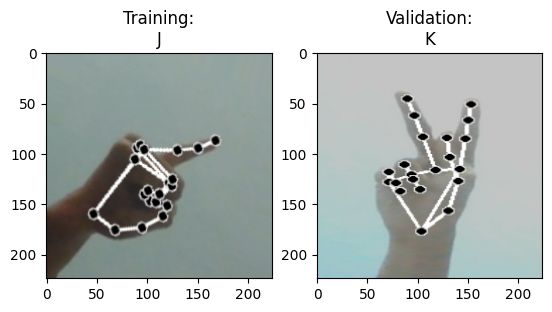

In [8]:
training_index = np.random.randint(len(training_images))
validation_index = np.random.randint(len(validation_images))

CATEGORIES = [chr(i + 65) for i in range(26)]
get_labels_training = CATEGORIES[np.argmax(training_labels[training_index])]
get_labels_validation = CATEGORIES[np.argmax(validation_labels[validation_index])]

plt.subplot(1,2,1)
plt.title(f"Training:\n{get_labels_training}")
plt.imshow(training_images[training_index])

plt.subplot(1,2,2)
plt.title(f"Validation:\n{get_labels_validation}")
plt.imshow(validation_images[validation_index])

plt.show()

In [9]:
def get_info_imgs(img, label, which_data):
  print(which_data)
  print(f"\tshape: {img.shape} \n\tsize (kb): {img.nbytes / 1024} kb \n\tsize (mb): {(img.nbytes / 1024) / 1024} mb \n\tsize 1 img(kb): {img[0].nbytes / 1024} kb \n\tsize 1 img(mb): {(img[0].nbytes / 1024) / 1024} mb \n\tlabels: {label.shape}")

In [10]:
get_info_imgs(training_images, training_labels, "Training")

Training
	shape: (32, 224, 224, 3) 
	size (kb): 18816.0 kb 
	size (mb): 18.375 mb 
	size 1 img(kb): 588.0 kb 
	size 1 img(mb): 0.57421875 mb 
	labels: (32, 26)


In [11]:
get_info_imgs(validation_images, validation_labels , "Validation")

Validation
	shape: (32, 224, 224, 3) 
	size (kb): 18816.0 kb 
	size (mb): 18.375 mb 
	size 1 img(kb): 588.0 kb 
	size 1 img(mb): 0.57421875 mb 
	labels: (32, 26)


## Aristektur

In [24]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16

## Load VGG16 model without the top layer and with pretrained weights on ImageNet
base_model = VGG16(
    input_shape=(224, 224, 3), # input shape for VGG16
    include_top=False, # exclude the top layer of the model
    weights='imagenet' # use pretrained weights on ImageNet dataset
)

# Freeze the base model to prevent it from being updated during training
base_model.trainable = False

# Create a new model on top of the base model using keras.Sequential([])
model = keras.Sequential([
    base_model, # add the base model as the first layer
    keras.layers.Flatten(), # flatten the output of the base model
    keras.layers.Dense(1024, activation='relu'), # add a dense layer with 1024 units and relu activation
    keras.layers.Dropout(0.5), # add a dropout layer to reduce overfitting
    keras.layers.Dense(num_classes, activation='softmax') # add a dense layer with num_classes units and softmax activation
])

# Compile model with a lower learning rate of 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 26)                26650     
                                                                 
Total params: 40,432,474
Trainable params: 25,717,786
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
# Import library
from tensorflow.keras.callbacks import ModelCheckpoint

# Create model checkpoint callback to save best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    # '/content/drive/MyDrive/Colab Notebooks/dataset/best_model.h5', # file name to save model
    '/content/drive/MyDrive/Colab Notebooks/dataset/best_model.h5', # file name to save model
    monitor='val_accuracy', # metric to monitor
    save_best_only=True, # save only the best model
    mode='max', # maximize the metric
    verbose=1 # print message when saving model
)

# Train model using train and validation generators and callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[model_checkpoint] # use both early stopping and model checkpoint callbacks
)

Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 3.2262 - accuracy: 0.0992
Epoch 1: val_accuracy improved from -inf to 0.46289, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model.h5
69/69 [==============================] - 42s 537ms/step - loss: 3.2262 - accuracy: 0.0992 - val_loss: 2.6049 - val_accuracy: 0.4629
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 2.5906 - accuracy: 0.2815
Epoch 2: val_accuracy improved from 0.46289 to 0.64062, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model.h5
69/69 [==============================] - 40s 576ms/step - loss: 2.5906 - accuracy: 0.2815 - val_loss: 2.0834 - val_accuracy: 0.6406
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 2.1302 - accuracy: 0.4692
Epoch 3: val_accuracy improved from 0.64062 to 0.72852, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model.h5
69/69 [==============================] - 40s 578ms/step - 

## Hasil training

In [27]:
# Mengakses nilai loss dan akurasi dari objek history
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

results = np.stack([loss, val_loss, acc, val_acc], axis=1)

# Menulis array 2D ke file CSV dengan header yang sesuai
# np.savetxt('/content/drive/MyDrive/Colab Notebooks/model/modelresults_mixed.csv', results, delimiter=',', header='loss,val_loss,acc,val_acc')
np.savetxt('./result/results_mixed.csv', results, delimiter=',', header='loss,val_loss,acc,val_acc')

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import mediapipe as mp

2023-05-30 14:23:46.196001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 14:23:46.466824: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 14:23:46.468032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 14:23:48.407939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
# model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/best_model.h5')
model = tf.keras.models.load_model('./result/best_model.h5')

2023-05-30 17:38:34.016272: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-05-30 17:38:34.093048: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-05-30 17:38:34.139951: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-05-30 17:38:35.020969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-05-30 17:38:35.126753: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


In [13]:
# Membaca file CSV sebagai array NumPy dengan melewati header
# results = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/model/results_mixed.csv', delimiter=',', skiprows=1)
results = np.loadtxt('./result/results_mixed.csv', delimiter=',', skiprows=1)

# Mengakses nilai loss, val_loss, acc, dan val_acc dari array NumPy
loss = results[:, 0]
val_loss = results[:, 1]
acc = results[:, 2]
val_acc = results[:, 3]

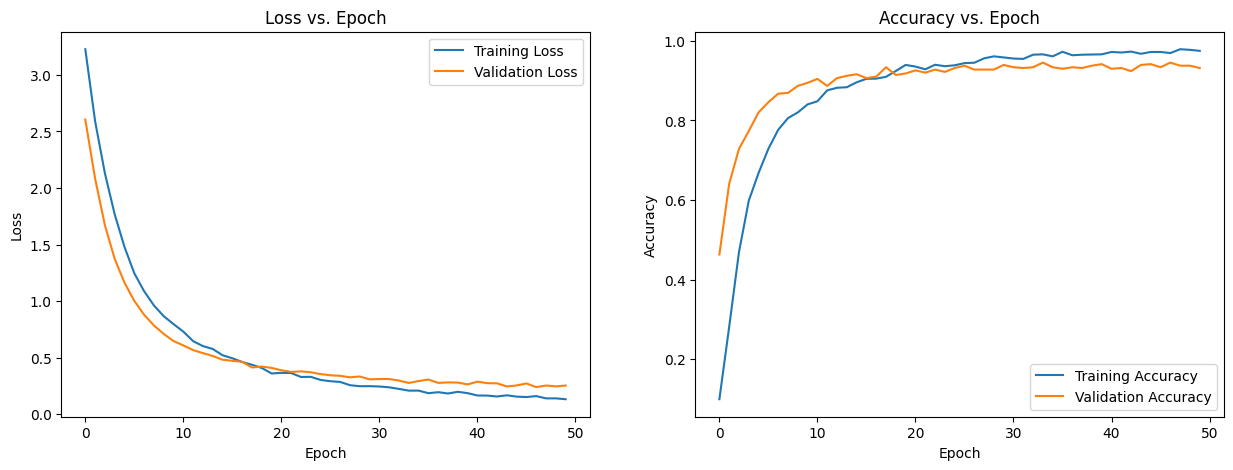

In [14]:
plt.figure(figsize=(15,5))

# Membuat plot loss terhadap epoch
plt.subplot(1,2,1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Membuat plot akurasi terhadap epoch
plt.subplot(1,2,2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
DATADIR = './dataset/'
TEST_PATH = DATADIR + 'Test'

# Create image data generator for test data with rescale 1./255
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory with test_datagen
test_generator = test_datagen.flow_from_directory(
    TEST_PATH, # directory of test images
    target_size=(224, 224), # resize images to 224x224
    color_mode='rgb', # use rgb images for VGG16
    batch_size=1, # use batch size of 1 for prediction
    class_mode=None, # do not use labels for prediction
    shuffle=False # do not shuffle the images
)

Found 104 images belonging to 26 classes.


In [16]:
predictions = model.predict(test_generator)

2023-05-30 17:38:54.394728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


104/104 [==============================] - 13s 116ms/step


In [17]:
predictions_ = np.argmax(predictions, axis=1)

# Convert predictions to class labels according to the dataset
class_labels = list(test_generator.class_indices.keys()) # get the class labels from the test generator
predicted_labels = [class_labels[p] for p in predictions_] # map the predictions to the class labels

# Print the predicted labels
print(predicted_labels)

['A', 'A', 'A', 'A', 'B', 'F', 'F', 'B', 'C', 'C', 'C', 'C', 'D', 'Z', 'D', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'J', 'I', 'I', 'J', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'N', 'N', 'M', 'N', 'N', 'N', 'N', 'N', 'O', 'O', 'O', 'O', 'P', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'Q', 'R', 'R', 'R', 'R', 'S', 'S', 'E', 'N', 'T', 'T', 'T', 'T', 'U', 'U', 'U', 'U', 'V', 'V', 'K', 'V', 'W', 'W', 'W', 'W', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Z', 'Z', 'Z', 'Z']


In [18]:
from sklearn.metrics import confusion_matrix

# Get the true labels from the test generator
true_labels = test_generator.labels

# Create confusion matrix using sklearn
cm = confusion_matrix(true_labels, predictions_)

# Calculate error rate for each class by dividing the number of incorrect predictions by the total number of predictions
error_rate = 1 - cm.diagonal() / cm.sum(axis=1)

# Print the error rate for each class
print(error_rate)

[0.   0.5  0.   0.25 0.   0.   0.   0.   0.   0.5  0.   0.   0.75 0.
 0.   0.   0.   0.   0.5  0.   0.   0.25 0.   0.   0.   0.  ]


## Open CV

In [7]:
# Mengimpor modul cv2
import cv2
import mediapipe as mp
import time
import os
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def predicted_label(input_image):
  img_rescale = (input_image * 1.0) / 255.0
  img_resize = cv2.resize(img_rescale, (224, 224))
  img_resize_expand = img_resize.reshape(1, *img_resize.shape)
  my_prediction = model.predict(img_resize_expand)
  my_label = CATEGORIES[np.argmax(my_prediction)]
  return my_label

1/1 [==============================] - 0s 189ms/step


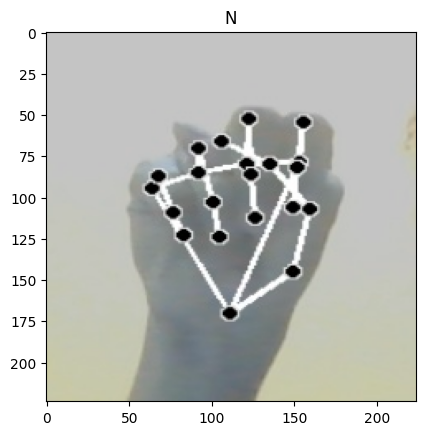

In [21]:
DATADIR = './dataset/'
TEST_PATH = DATADIR + 'Test'
CATEGORIES = [chr(i + 65) for i in range(26)]

get_test_dir = os.listdir(TEST_PATH)

for img_dir in get_test_dir:
  join_path_subdir = os.path.join(TEST_PATH, img_dir)
  for img in os.listdir(join_path_subdir):
    target_img = os.path.join(join_path_subdir, img)
    read_img = cv2.imread(target_img, cv2.COLOR_BGR2RGB)
    
    ## Preparation Code for prepraprocess
    my_label = predicted_label(read_img)
    ## End Preparation Code for prepraprocess
    
    plt.imshow(read_img)
    plt.title(my_label)
    plt.show()
    break
  break
